# Operation Julin and the ANMO mystery #

This project was originally trying to compare the different spectrogram signatures of a nuclear test with that of a natural earthquake in the similar region. But Instead I discovered something quite interesting (to me at least).

In [1]:
import obspy
from obspy import UTCDateTime
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client

In [2]:
client=Client('IRIS')

# Part 1: Analysis of Op Julin - Junction #

*Junction* was a 100kt underground detonation in the Nevada Test Site not far from Las Vegas. It was the second and largest shot of the Julin series of nuclear tests, which was supposed to be the final testing operation before the US ratified the Comprehensive Test Ban Treaty.

The test was conducted on 1992-03-26 at 16:30UTC - this is reflected in the parameters below. The data is drawn from station `ANMO` in New Mexico

In [3]:
startt=UTCDateTime('1992-03-26T16:25')
endt=UTCDateTime('1992-03-26T16:45')
sta='ANMO'
cha='BHZ'

In [4]:
st=client.get_waveforms('IU', sta, '*', cha, startt, endt)

### Seismogram ###

The seismogram of *Op Julin-Junction* looks superficially similar to that of a nearby large earthquake, except that the first arrival is quite large. In many seismograms the P arrival is smaller than the surface wave arrivals.

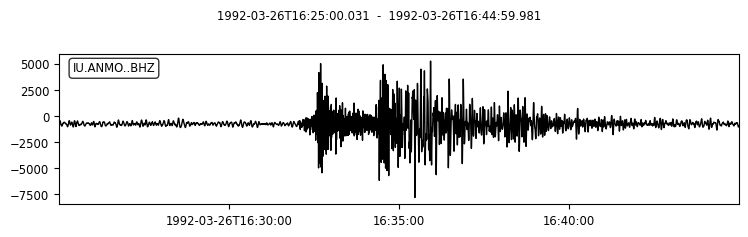

In [5]:
st.plot()
tr=st[0]

### Spectrogram ###

(2.1644605188362628e-06, 7394.4070429753965)


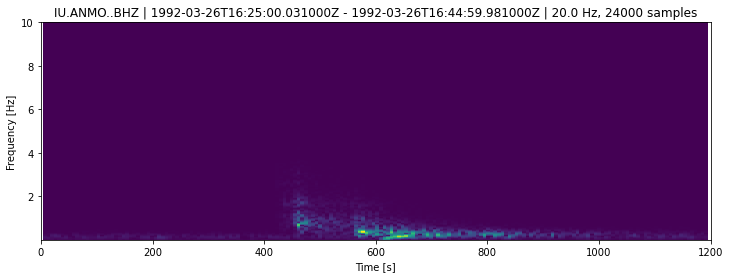

In [6]:
plt.rcParams['figure.figsize']=(12,4) #sets window size
fig=tr.spectrogram(wlen=10, per_lap=0.5, show=False)
ax=fig.axes[0]
im=ax.images[0]
print(im.get_clim())

**Above**: Not much information can be gleaned from the seismogram because a lot of the energy is concentrated at the lower frequencies. There is also a wide range of amplitudes so the very high amplitudes drown out the lower amplitudes. 

The next line adds a Decibel type amplitude scale so that the lower amplitudes are more visible

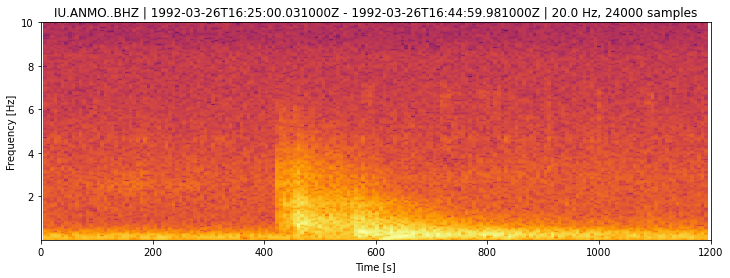

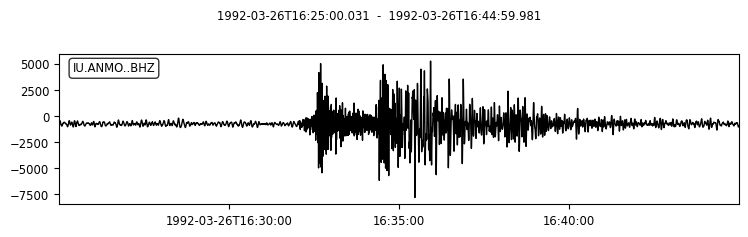

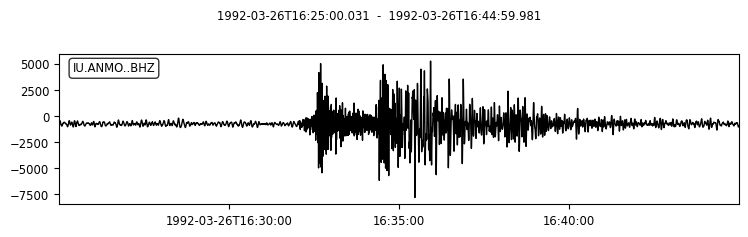

In [7]:
fig=tr.spectrogram(wlen=10, per_lap=0.5, show=False, cmap='inferno', dbscale=True)
st.plot()

**Above**: The spectrogram and seismogram plotted together. We can see that there's noise most strongly at below 1.5Hz. The energy starts abruptly at frquencies from 0-8Hz and slowly slides down to

# Part 2: August 1 1999 M5.9 Nevada earthquake, and a mystery signal #

In [8]:
startt=UTCDateTime('1999-08-01T16:05')
endt=UTCDateTime('1999-08-01T16:20')
sta='ANMO'
cha='BHZ'

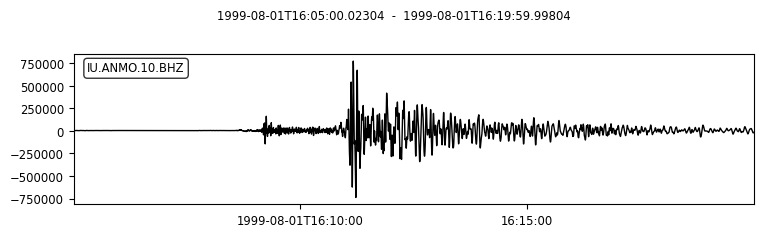

In [9]:
st=client.get_waveforms('IU', sta, '10', cha, startt, endt)
st.plot()
tr=st[0]

(6.1534375469124661e-05, 941679.43307392159)


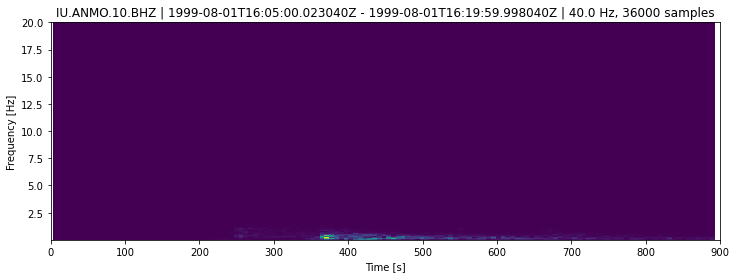

In [10]:
fig=tr.spectrogram(wlen=10, per_lap=0.5, show=False)
ax=fig.axes[0]
im=ax.images[0]
print(im.get_clim())

(0.0, 10.0)

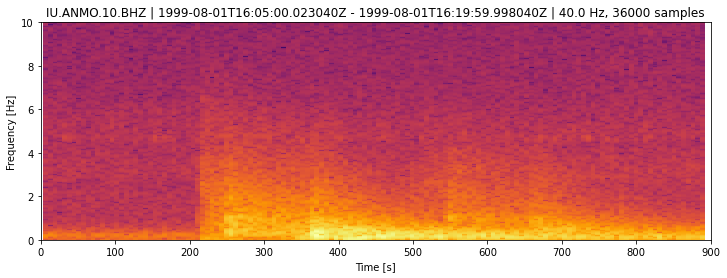

In [11]:
fig=tr.spectrogram(wlen=10, per_lap=0.5, show=False, cmap='inferno', dbscale=True)
ax=fig.axes[0]
ax.set_ylim(0, 10) #to match with the Julin seismogram

But as we can see the new seismogram is 40Hz. So lets see what's in the frequencies above

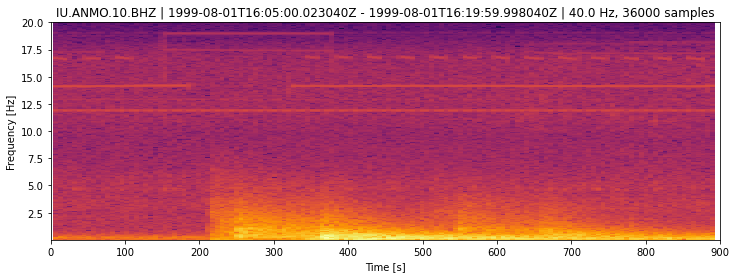

In [12]:
fig=tr.spectrogram(wlen=10, per_lap=0.5, show=False, cmap='inferno', dbscale=True)

# Closer look at the interesting bits

In [13]:
startt=UTCDateTime('1999-08-01T00:00')
endt=UTCDateTime('1999-08-02T00:00')
sta='ANMO'

In [14]:
anmo=client.get_stations(network='IU', station=sta, starttime=startt, endtime=endt, level='channel')
print(anmo)

Inventory created at 2020-09-03T17:25:07.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.45
		    http://service.iris.edu/fdsnws/station/1/query?starttime=1999-08-01...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IU
		Stations (1):
			IU.ANMO (Albuquerque, New Mexico, USA)
		Channels (35):
			IU.ANMO.00.BHZ, IU.ANMO.00.BH1, IU.ANMO.00.BH2, IU.ANMO.00.LDI, 
			IU.ANMO.00.LFZ, IU.ANMO.00.LHZ, IU.ANMO.00.LH1, IU.ANMO.00.LH2, 
			IU.ANMO.00.LWS, IU.ANMO.00.UDI, IU.ANMO.00.UFZ, IU.ANMO.00.UHZ, 
			IU.ANMO.00.UH1, IU.ANMO.00.UH2, IU.ANMO.00.UWS, IU.ANMO.00.VDI, 
			IU.ANMO.00.VE1, IU.ANMO.00.VFZ, IU.ANMO.00.VHZ, IU.ANMO.00.VH1, 
			IU.ANMO.00.VH2, IU.ANMO.00.VK1, IU.ANMO.00.VWS, IU.ANMO.10.BHZ, 
			IU.ANMO.10.BH1, IU.ANMO.10.BH2, IU.ANMO.10.HHZ, IU.ANMO.10.HH1, 
			IU.ANMO.10.HH2, IU.ANMO.10.LHZ, IU.ANMO.10.LH1, IU.ANMO.10.LH2, 
			IU.ANMO.10.VHZ, IU.ANMO.10.VH1, IU.ANMO.10.VH2


In [15]:
bhz=client.get_waveforms('IU', sta, '10', 'BHZ', startt, endt)

In [16]:
print(bhz)

1 Trace(s) in Stream:
IU.ANMO.10.BHZ | 1999-08-01T00:00:00.023000Z - 1999-08-01T23:59:59.998000Z | 40.0 Hz, 3456000 samples


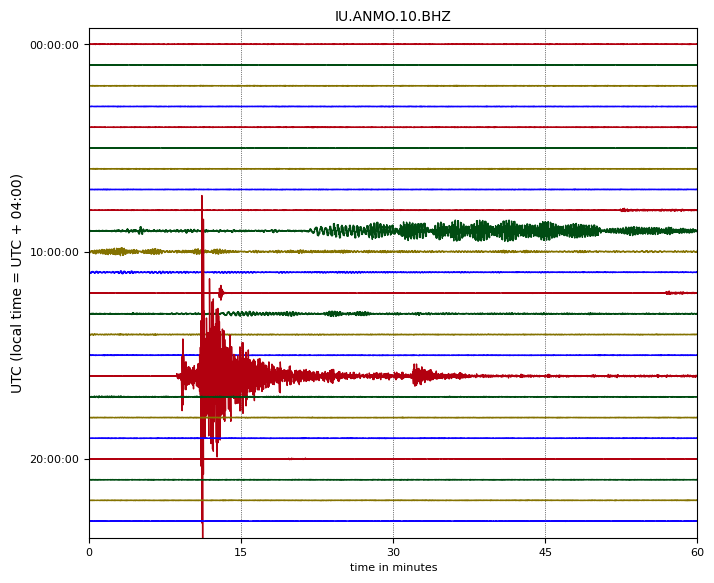

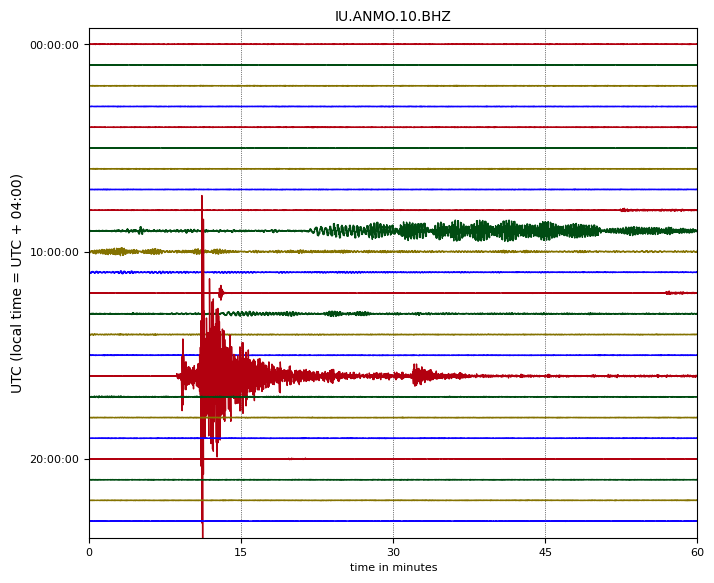

In [17]:
bhz.plot(type='dayplot', interval=60)

**Above**: So we see that there's another interesting event at 0900Z but let's see if the steady signal is present across from about an hour before the earthquake

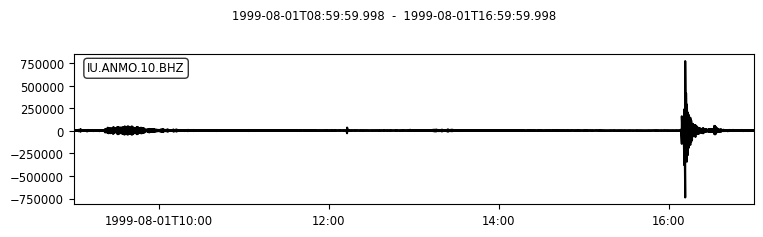

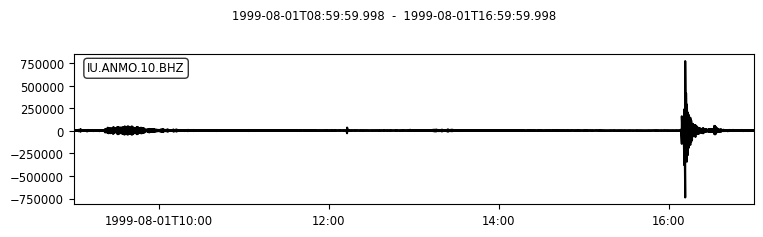

In [18]:
signal=bhz.trim(starttime=UTCDateTime('1999-08-01T09:00'), endtime=UTCDateTime('1999-08-01T17:00'))
signal.plot()

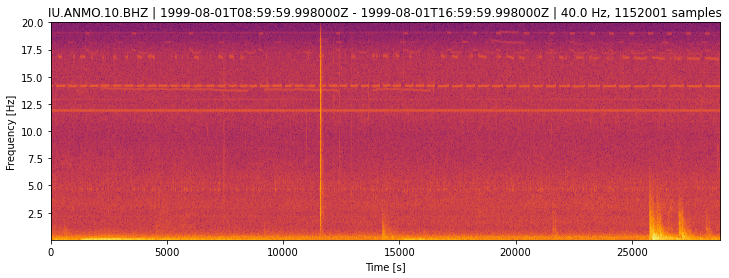

In [19]:
sigtrace=signal[0]
plt.rcParams['figure.figsize']=(12,4)
fig=sigtrace.spectrogram(wlen=10, per_lap=0.5, show=False, cmap='inferno', dbscale=True)

**Above**

Lets take a look at the events that are happening betwenn 0900Z and 1000Z

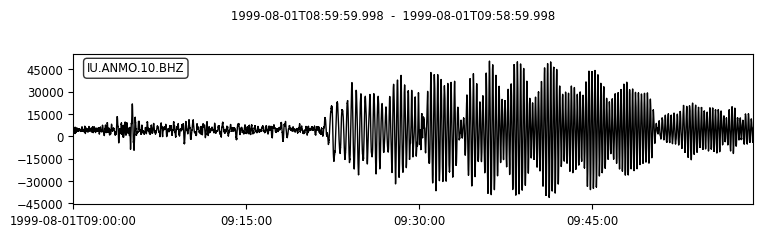

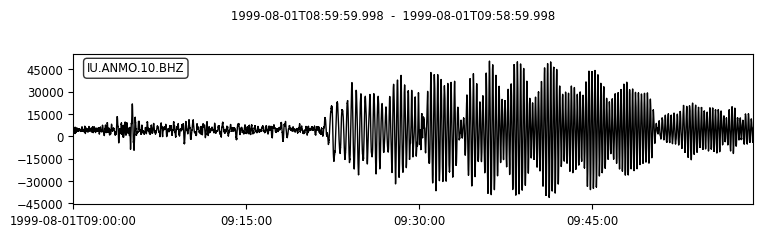

In [20]:
nine=bhz.trim(starttime=UTCDateTime('1999-08-01T09:00'), endtime=UTCDateTime('1999-08-01T09:59'))
nine.plot()

**Above**: I still have no idea what I'm looking at so we need to do a spectral analysis of this.

Since this trace is an hour long let's use a longer `wlen`

(-75.069023250676892, 102.35881107762518)


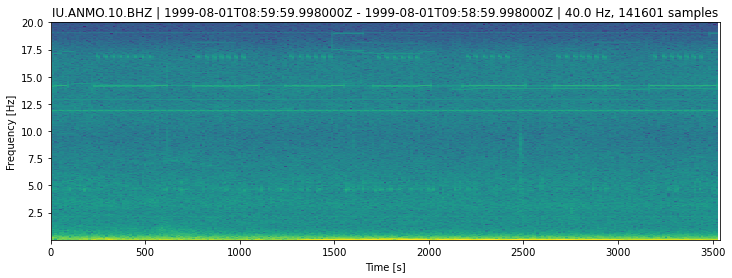

In [21]:
trnine=nine[0]
fig=trnine.spectrogram(wlen=20, per_lap=0.5, show=False, dbscale=True)
ax=fig.axes[0]
im=ax.images[0]
print(im.get_clim())

**Above**: So we can't see much here because a lot of the energy is in the lower frequencies so let's try a logarithimic frequency scale.

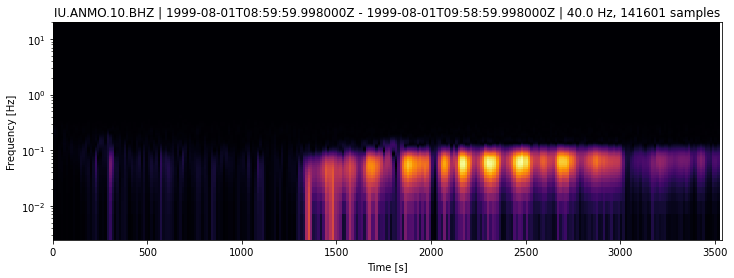

In [22]:
fig=trnine.spectrogram(wlen=20, per_lap=0.5, show=False, log=True, cmap='inferno')

**Above**: we can see that the energy is in pulses of low frequency most strongly in the between 0.01-0.1Hz

### Attempting to filter the 0900Z anomaly ###
   
Let's put a filter and see what shows up

In [23]:
trcopy=trnine.copy()
trcopy.detrend(type='demean')

IU.ANMO.10.BHZ | 1999-08-01T08:59:59.998000Z - 1999-08-01T09:58:59.998000Z | 40.0 Hz, 141601 samples

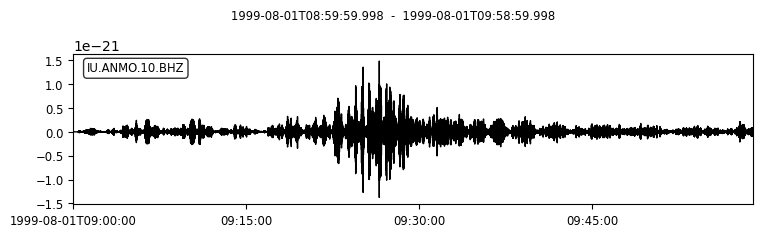

IU.ANMO.10.BHZ | 1999-08-01T08:59:59.998000Z - 1999-08-01T09:58:59.998000Z | 40.0 Hz, 141601 samples

In [35]:
trcopy.plot()
trcopy.filter(type='highpass', freq=5)

**Above**: Very interesting, but not very helpful. 

Lets figure out if we can remove instrument response.

### Attempt to remove response ###

In [25]:
st=client.get_waveforms('IU', sta, '10', cha, startt, endt, attach_response=True)

In [26]:
filt= (0.005, 0.01, 35, 40.0)
stcopy1=st.copy().remove_response(output='VEL', pre_filt=filt)

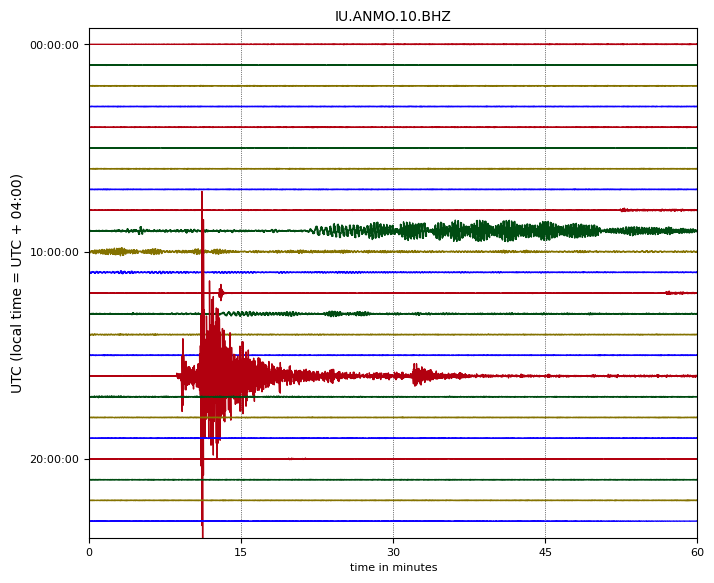

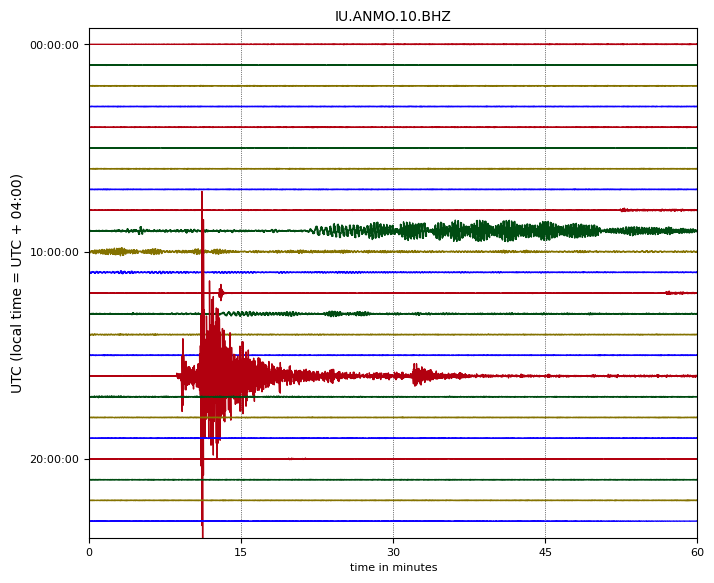

In [27]:
stcopy1.plot(type='dayplot', interval=60)

**Above**: Even after performing a response removal the seismogram looks the same. So I'm guessing this is not a problem with the instrument response. But the module on instrumnt response was so brief and I haven't covered it in more detail in uni yet, so I'm not even sure if my operaion here was correct. It was worth a try though

## Problem with instrument or localised event? ##

Now I'm going to check if there's the same signal on other instrument and nearby stations